# 第四回：文字图例尽眉目 :id=task4_1
--- 
（本学习笔记来源于[DataWhale-数据可视化](https://datawhalechina.github.io/fantastic-matplotlib/)，部分内容来自莫烦PYTHON教程）

```md
绿袖招兮,我心欢朗.  
Greensleeves was all my joy 
```

本回知识归纳： 
- Figure和Axes上的文本： `text`, `title`,`suptitle`,`plg.figtext`,`xlabel和ylabel`,`annotate`,字体的属性设置和`MathText`
- Tick上的文本： 简单模式，`Tick Locators` 和 `Formatters`
- 图例（legend） : `plt.legend`

## Figure和Axes上的文本  :id=task4_101

Matplotlib具有广泛的文本支持，包括对数学表达式的支持、对栅格和矢量输出的TrueType支持、具有任意旋转的换行分隔文本以及Unicode支持。


#### text

在`Axes`的任意位置添加文本。

命令式：`matplotlib.pyplot.text`，面向对象：`matplotlib.axes.Axes.text`。



#### title
向`Axes`添加标题。

命令式：`matplotlib.pyplot.title`，面向对象：`matplotlib.axes.Axes.set_title`。

#### figtext

向`Figure`的任意位置添加文本。

命令式：`matplotlib.pyplot.figtext`，面向对象：`matplotlib.figure.Figure.text`。

##### suptitle
向`Figure`添加标题。

命令式：`matplotlib.pyplot.suptitle`，面向对象：`matplotlib.figure.Figure.suptitle`。


#### xlabel
向 `x` 轴添加轴标签。

命令式：`matplotlib.pyplot.xlabel`，面向对象：`matplotlib.axes.Axes.set_xlabel`。

#### ylabel
向 `y` 轴添加轴标签。

命令式：`matplotlib.pyplot.ylabel`，面向对象：`matplotlib.axes.Axes.set_ylabel`。


#### annotate
向`Axes`添加标注，带有可选的箭头。

命令式：`matplotlib.pyplot.annotate`，面向对象：`matplotlib.axes.Axes.annotate`。

所有这些函数创建并返回一个$matplotlib.text.Text()$实例，它可以配置各种字体和其他属性。 下面的示例在实战中展示所有这些命令。

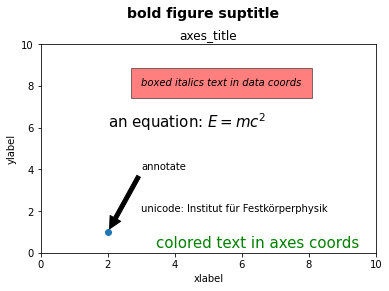

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes_title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [7]:
## 字体的属性设置

In [8]:
#首先可以查看matplotlib所有可用的字体
from matplotlib import font_manager
font_family = font_manager.fontManager.ttflist
font_name_list = [i.name for i in font_family]
for font in font_name_list[:10]:
    print(f'{font}\n')

STIXGeneral

cmsy10

STIXSizeTwoSym

cmss10

cmtt10

DejaVu Sans

DejaVu Serif Display

DejaVu Serif

DejaVu Sans Mono

STIXSizeOneSym



In [9]:
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

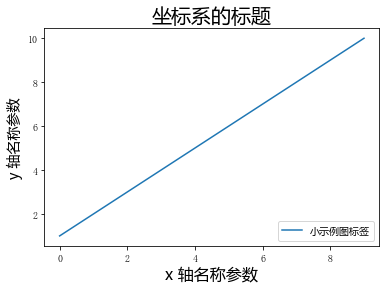

In [10]:
#局部字体的修改方法1
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字。
plt.xlabel('x 轴名称参数', fontproperties='Microsoft YaHei', fontsize=16)         # 设置x轴名称，采用微软雅黑字体
plt.ylabel('y 轴名称参数', fontproperties='Microsoft YaHei', fontsize=14)         # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties='Microsoft YaHei', fontsize=20)         # 设置坐标系标题的字体
plt.legend(loc='lower right', prop={"family": 'Microsoft YaHei'}, fontsize=10);    # 小示例图的字体设置

### 数学表达式

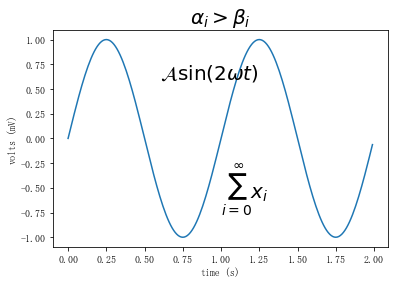

In [11]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

## Tick上的文本  :id=task04_102

设置tick（刻度）和ticklabel（刻度标签）也是可视化中经常需要操作的步骤，matplotlib既提供了自动生成刻度和刻度标签的模式（默认状态），同时也提供了许多让使用者灵活设置的方式。

#### 1.简单模式

可以使用`axis`的`set_ticks`方法手动设置标签位置，使用`axis`的`set_ticklabels`方法手动设置标签格式

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

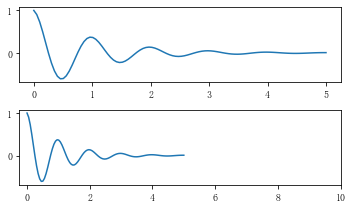

In [14]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
plt.show()

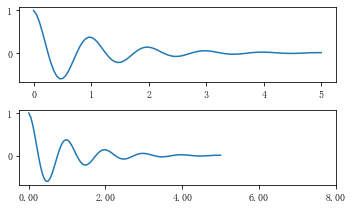

In [15]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla)
plt.show()

<a list of 14 Line2D ticklines objects>


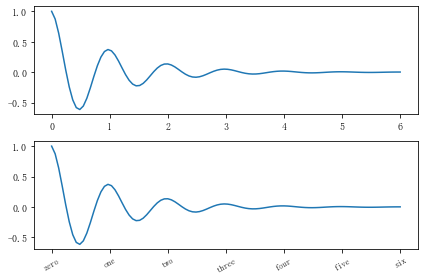

In [16]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('bottom')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines())
plt.show()

#### 2.Tick Locators and Formatters

除了上述的简单模式，还可以使用`Tick Locators and Formatters`完成对于刻度位置和刻度标签的设置。 其中`Axis.set_major_locator`和`Axis.set_minor_locator`方法用来设置标签的位置，`Axis.set_major_formatter`和`Axis.set_minor_formatter`方法用来设置标签的格式。这种方式的好处是不用显式地列举出刻度值列表。

**Tick Formatters**

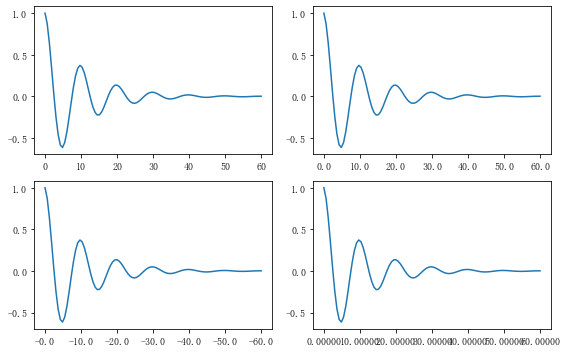

In [17]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter)

plt.show()

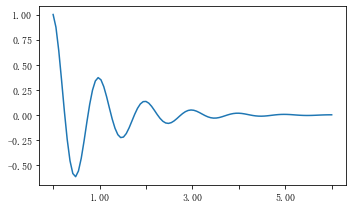

In [19]:
 # 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks)
plt.show()

**Tick Locators**


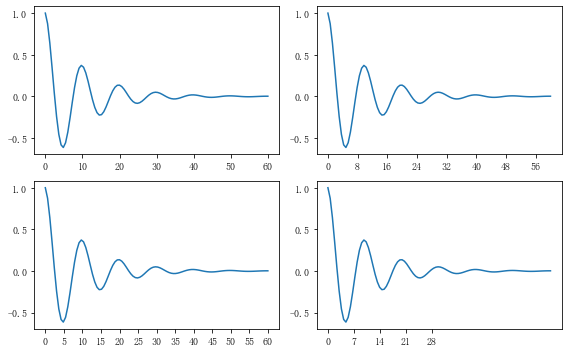

In [20]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=10)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

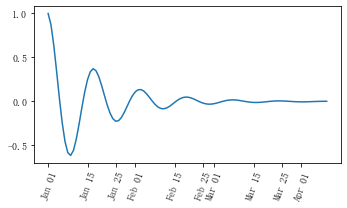

In [21]:
import matplotlib.dates as mdates
import datetime
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

## legend（图例） :id=task04_103

matplotlib 中的 `legend` 图例就是为了帮我们展示出每个数据对应的图像名称. 

([<matplotlib.axis.YTick at 0x2c87af29130>,
 [Text(0, -2.0, '$really\\ bad$'),
  Text(0, -1.8, '$bad$'),
  Text(0, -1.0, '$normal$'),
  Text(0, 1.22, '$good$'),
  Text(0, 3.0, '$really\\ good$')])

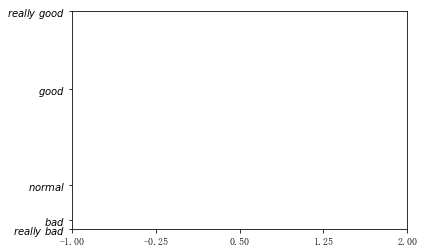

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2

plt.figure()
#set x limits
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# set new sticks
new_sticks = np.linspace(-1, 2, 5)
plt.xticks(new_sticks)
# set tick labels
plt.yticks([-2, -1.8, -1, 1.22, 3],
           [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])

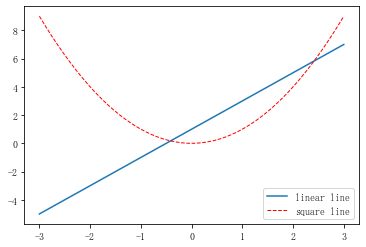

In [24]:
# set line syles
l1 = plt.plot(x, y1, label='linear line')
l2 = plt.plot(x, y2, color='red', linewidth=1.0, linestyle='--', label='square line')
plt.legend()

如果希望图例能够更加个性化，可通过以下方式更改：参数 loc 决定了图例的位置,比如参数 loc='upper right' 表示图例将添加在图中的右上角。
其中’loc’参数有多种，’best’表示自动分配最佳位置，其余的如下：
'best' : 0,  
'upper right' : 1,  
'upper left' : 2,  
'lower left' : 3,  
'lower right' : 4,  
'right' : 5,  
'center left' : 6,  
'center right' : 7,  
'lower center' : 8,  
'upper center' : 9,  
'center' : 10  

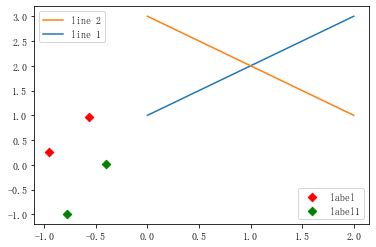

In [25]:
#这个案例是显示多图例legend
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4)
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["line 2", "line 1"], loc='upper left')
 
p3 = plt.scatter(x[0:2], y[0:2], marker = 'D', color='r')
p4 = plt.scatter(x[2:], y[2:], marker = 'D', color='g')
# 下面这行代码由于添加了新的legend，所以会将l1从legend中给移除
plt.legend([p3, p4], ['label', 'label1'], loc='lower right', scatterpoints=1)
# 为了保留之前的l1这个legend，所以必须要通过plt.gca()获得当前的axes，然后将l1作为单独的artist
plt.gca().add_artist(l1);

## 参考资料  :id=task04_104

- [datawhale-matplotlib数据可视化-29期](https://datawhalechina.github.io/fantastic-matplotlib/)
- [matplotlib官网用户指南](https://matplotlib.org/stable/tutorials/introductory/usage.html)
- [莫烦PYTHON](https://morvanzhou.github.io/tutorials/data-manipulation/plt/1-1-why/)
- [Matplotlib 用户指南](https://wizardforcel.gitbooks.io/matplotlib-user-guide/content/4.2.html)